<a href="https://colab.research.google.com/github/sonjaove/progg-and-DS-from-IITM/blob/ML/W5_Programming_withoutSol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt

This assignments has two sections:
* Linear Regression
* Kernel Regression




# Section 1:

**Linear Regression**

We will use the Boston_housing dataset for the regression problem. Run the below cell to get the following variables:
* `Training_data` = Training data matrix of shape $(n, d)$
* `labels` = label vector corresponding to the training data
* `test_data` = Test data matrix of shape $(n_1, d)$ where $n_1$ is the number of examples in test dataset.
* `test_labels` = label vector corresponding to the test data

Use this dataset for the regression problem.

In [10]:
from keras.datasets import boston_housing
Train, test = boston_housing.load_data(seed= 111)
Training_data, labels = Train[0], Train[1]
Test_data, test_labels = test[0], test[1]

## Question 1
How many examples are there in the training dataset?



In [11]:
## Enter your solution here
Training_data.shape

(404, 13)

## Question 2
How many examples are there in the test dataset?



In [12]:
## Enter your solution here
Test_data.shape

(102, 13)

## Question 3

How many features are there in the dataset?



In [13]:
## Enter your solution here
Test_data.shape[1]

13

Linear regression model for the dataset ${\mathbb{x}, y}$ is given as
$$h_w(\mathbb{x}) = w_1x^{1}+w_2x^{2}+...+w_dx^{d} =  \mathbb{x}^Tw
$$

where $x^{i}$ is the $i^{th}$ feature, $\mathbb{x}$ is the feature matrix of shape $(d, n)$ and $w = [w_1, w_2, ...w_d]^T$ is the weight vector.


Notice that above model always pass through the origin but for a given dataset, best fit model need not pass through the origin. To tackle this issue, we add an intercept $w_0$ in the model and set the corresponding featrue $x^{0}$ to $1$. That is

$$h_w(\mathbb{x}) =w_0x^{0}+ w_1x^{1}+w_2x^{2}+...+w_dx^{n} =  \mathbb{x}^Tw
$$

We call $x^{0}$ the dummy feature and set its value to 1 for each examples. Now $w$ is of shape $(d+1, 1)$ and $\mathbb{x}$ is of shape $(d+1, n)$ where the first row of $\mathbb{x}$ has entries as 1.


## Task

Add the dummy feature in the feature matrix `Training_data` and test data matrix `test_data`. We will be using this new feature matrices (after adding te dummy feature) for learning the model.

Note: As per your convenience, you can convert the shape of the training dataset to $(d, n)$.

In [14]:
## Enter your solution here
Training_data_with_dummy = np.c_[np.ones(Training_data.shape[0]), Training_data]
Test_data_with_dummy = np.c_[np.ones(Test_data.shape[0]), Test_data]

## Question 4
If the solution of optimization problem is obtained by setting the first derivative of loss function (squared loss) to zero, find the value of $w_0+w_1+...w_d$.




In [15]:
## Enter your solution here
X = Training_data_with_dummy
y = labels

# Normal equation: w = (X^T X)^{-1} X^T y
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w

array([ 3.39712899e+01, -1.19191426e-01,  3.49034448e-02,  4.76183993e-02,
        4.22247932e+00, -1.93428312e+01,  4.23451257e+00,  7.00963079e-03,
       -1.37028486e+00,  3.52625213e-01, -1.32525419e-02, -1.01042893e+00,
        1.06098912e-02, -5.00476986e-01])

In [16]:
wtot=np.sum(w)
wtot

20.524582464658266

## Question 5
Find the average of the predictions made by the above model.



In [20]:
## Enter your solution here
x=Test_data_with_dummy
predictions = X.dot(w)
average_prediction = np.mean(predictions)
average_prediction

22.309158415841498

In [21]:
np.mean(X)

65.05256202970297

## Question 6

Find the loss for the training data points using the above model. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [18]:
## Enter your solution here
# Compute the predictions on the training data
predictions_train = X.dot(w)

# Number of training examples
n = len(labels)

# Compute the squared differences between true values and predictions
squared_errors = (labels - predictions_train) ** 2

# Compute the loss as per the given formula
loss = np.sqrt(np.sum(squared_errors) / n)

# Output the loss
loss

4.552387969840813

## Question 7

Find the loss for the test data points using the above model. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [22]:
## Enter your solution here
# Compute the predictions on the test data
predictions_test = x.dot(w)

# Number of test examples
n_test = len(test_labels)

# Compute the squared differences between true values and predictions
squared_errors_test = (test_labels - predictions_test) ** 2

# Compute the loss as per the given formula
loss_test = np.sqrt(np.sum(squared_errors_test) / n_test)

# Output the loss for the test data
loss_test

5.327662216181637

## Question 8
Find the weights using the gradient descent. Use a constant learning rate of $\eta = 10^{-10}$. Initialize the weight vector as zero vector and update the weights for 100 iterations. Enter the sum of all the weights.



In [23]:
## Enter your solution here
# Initialize parameters
eta = 1e-10  # Learning rate
iterations = 100
n = len(labels)  # Number of training examples
d = X.shape[1]  # Number of features including the dummy feature

# Initialize weight vector to zero
w_gd = np.zeros(d)

# Gradient descent loop
for i in range(iterations):
    # Compute predictions
    predictions = X.dot(w_gd)

    # Compute the gradient
    gradient = -(2/n) * X.T.dot(y - predictions)

    # Update the weights
    w_gd = w_gd - eta * gradient

# Compute the sum of all weights
sum_of_weights = np.sum(w_gd)

# Output the sum of the weights
sum_of_weights

0.00039286355135382525

## Question 9

Find the loss for the training data points if the model is learnt using the gradient descent as in question 8. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [24]:
## Enter your solution here
import numpy as np

# Initialize variables
X = Training_data_with_dummy  # Training data with the dummy feature
y = labels  # True labels
n, d = X.shape  # Number of examples (n) and features (d)
w = np.zeros(d)  # Initialize weights to zero
eta = 1e-10  # Learning rate
iterations = 100  # Number of iterations

# Gradient Descent
for _ in range(iterations):
    # Compute the predictions
    predictions = X.dot(w)

    # Compute the gradient: ∇L(w) = -(2/n) * X.T * (y - Xw)
    gradient = -(2/n) * X.T.dot(y - predictions)

    # Update weights
    w = w - eta * gradient

# Sum of all weights after 100 iterations
sum_weights = np.sum(w)
print("Sum of all weights:", sum_weights)

# Step 2: Compute the loss for the training data
predictions_train = X.dot(w)  # Predictions with learned weights
squared_errors_train = (y - predictions_train) ** 2
loss_train = np.sqrt(np.sum(squared_errors_train) / n)

# Output the loss
loss_train

Sum of all weights: 0.00039286355135382525


24.045823388028428

## Question 10

Find the loss for the test data points if the model is learnt using the gradient descent as in question 8. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [25]:
## Enter your solution here
## Enter your solution here
import numpy as np

# Initialize variables
X = Test_data_with_dummy  # Training data with the dummy feature
y =  test_labels # True labels
n, d = X.shape  # Number of examples (n) and features (d)
w = np.zeros(d)  # Initialize weights to zero
eta = 1e-10  # Learning rate
iterations = 100  # Number of iterations

# Gradient Descent
for _ in range(iterations):
    # Compute the predictions
    predictions = X.dot(w)

    # Compute the gradient: ∇L(w) = -(2/n) * X.T * (y - Xw)
    gradient = -(2/n) * X.T.dot(y - predictions)

    # Update weights
    w = w - eta * gradient

# Sum of all weights after 100 iterations
sum_weights = np.sum(w)
print("Sum of all weights:", sum_weights)

# Step 2: Compute the loss for the training data
predictions_train = X.dot(w)  # Predictions with learned weights
squared_errors_train = (y - predictions_train) ** 2
loss_train = np.sqrt(np.sum(squared_errors_train) / n)

# Output the loss
loss_train

Sum of all weights: 0.0004165000891285572


24.88093238532755

## Question 11
Find the weights using the stochastic gradient descent. Use a constant learning rate of $\eta = 10^{-8}$. Initialize the weight vector as zero vector and update the weights for 1000 iterations. . Take the batch size of $⌈\text{number of samples}/5⌉ $. For sampling the batch examples in $ith$ iteration, set seed at $i$. The final weight is the last updated weight. Do not take the avearge of weights updated in all the iterations. Enter the sum of all the weights.




In [26]:
## Enter your solution here
import numpy as np

# Initialize variables
X = Training_data_with_dummy  # Training data with the dummy feature
y = labels  # True labels
n, d = X.shape  # Number of examples (n) and features (d)
w = np.zeros(d)  # Initialize weights to zero
eta = 1e-8  # Learning rate
iterations = 1000  # Number of iterations
batch_size = int(np.ceil(n / 5))  # Batch size

# Stochastic Gradient Descent
for i in range(iterations):
    np.random.seed(i)  # Set the seed at each iteration
    # Randomly sample a batch
    indices = np.random.choice(n, batch_size, replace=False)
    X_batch = X[indices]
    y_batch = y[indices]

    # Compute the predictions for the batch
    predictions_batch = X_batch.dot(w)

    # Compute the gradient for the batch
    gradient = -(2/batch_size) * X_batch.T.dot(y_batch - predictions_batch)

    # Update weights
    w = w - eta * gradient

# Sum of all weights after 1000 iterations
sum_weights = np.sum(w)
print("Sum of all weights:", sum_weights)

Sum of all weights: 0.06524986178321131


## Question 12

Find the loss for the training data points if the model is learnt using the stochastic gradient descent as in question 11. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [27]:
## Enter your solution here
# Compute the predictions for the training data using the final weights
X=Training_data_with_dummy
predictions_train_sgd = X.dot(w)  # X is Training_data_with_dummy, w is the final weight from SGD

# Number of training examples
n_train = len(labels)

# Compute the squared differences between true labels and predictions
squared_errors_train_sgd = (labels - predictions_train_sgd) ** 2

# Compute the loss as per the given formula
loss_train_sgd = np.sqrt(np.sum(squared_errors_train_sgd) / n_train)

# Output the loss
loss_train_sgd

10.215826867450467

## Question 13

Find the loss for the test data points if the model is learnt using the stochastic gradient descent as in question 11. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.


In [28]:
## Enter your solution here
## Enter your solution here
# Compute the predictions for the training data using the final weights
X=Training_data_with_dummy
predictions_train_sgd = X.dot(w)  # X is Training_data_with_dummy, w is the final weight from SGD

# Number of training examples
n_train = len(labels)

# Compute the squared differences between true labels and predictions
squared_errors_train_sgd = (labels - predictions_train_sgd) ** 2

# Compute the loss as per the given formula
loss_train_sgd = np.sqrt(np.sum(squared_errors_train_sgd) / n_train)

# Output the loss
loss_train_sgd

10.215826867450467

# Section 2:

**kernel Regression**

We will generate the synthetic dataset for the kernel regression problem. Run the following cell to get the following variables:

`X` = Training data matrix of shape $(n, d)$. In the given dataset $d = 1$.

`y` = label vector corresponding to the training dataset

In [29]:
rng = np.random.default_rng(seed = 101)
X = np.arange(-2, 2, 0.01).reshape(-1, 1)
y = X**3 + rng.normal(0, 1, X.shape[0]).reshape(-1, 1)


## Question 14

Plot the scatter plot between feature and the labels. Enter your answer as 0.



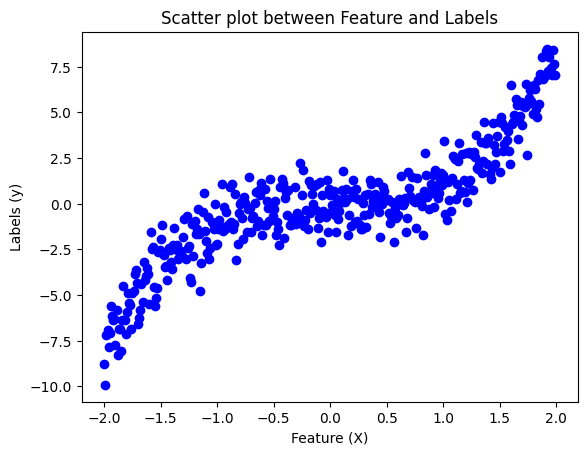

In [30]:
## Enter your solution here
import matplotlib.pyplot as plt

# Scatter plot between feature X and labels y
plt.scatter(X, y, color='blue')

# Labeling the plot
plt.xlabel('Feature (X)')
plt.ylabel('Labels (y)')
plt.title('Scatter plot between Feature and Labels')

# Display the plot
plt.show()


## Question 15
How many examples are there in the training dataset?



In [31]:
## Enter your solution here
n_examples = Training_data.shape[0]
print("Number of examples in the training dataset:", n_examples)


Number of examples in the training dataset: 404


## Task:

Add the dummy feature in the feature matrix `X`and reshape it to the shape $(d, n)$.

In [32]:
## Enter your solution here
import numpy as np

# Add the dummy feature (column of ones)
X_with_dummy = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones as the first column

# Reshape the matrix to (d, n), where d is the number of features and n is the number of samples
X_reshaped = X_with_dummy.T  # Transpose to get shape (d, n)

# Check the shape
print("Shape of the reshaped feature matrix:", X_reshaped.shape)

Shape of the reshaped feature matrix: (2, 400)


## Question 16

Our task is to apply the kernel regression with polynomial kernel of degree 3. We know that weight vector can be written as

$$w = \phi(\mathbb{x})\alpha$$

let us call the vector $\alpha$ as coefficient vector. Find the sum of elements in the coefficient vector.



In [33]:
## Enter your solution here
import numpy as np
X=X_with_dummy
# Assuming X is the feature matrix and y is the label vector
n = X.shape[0]

# Step 1: Compute the Kernel Matrix (Polynomial kernel of degree 3)
K = (X.dot(X.T) + 1) ** 3  # Kernel matrix of size (n, n)

# Step 2: Solve for alpha (K * alpha = y)
alpha = np.linalg.solve(K, y)

# Step 3: Compute the sum of elements in the coefficient vector alpha
sum_alpha = np.sum(alpha)
print("Sum of elements in the coefficient vector:", sum_alpha)


Sum of elements in the coefficient vector: -3.5


## Question 17

Find the sum of the predictions made by the kernel regression model of degree 3.



In [34]:
## Enter your solution here
# Step 1: Compute the Kernel Matrix (Polynomial kernel of degree 3)
X=X_with_dummy
K = (X.dot(X.T) + 1) ** 3  # Kernel matrix of size (n, n)

# Step 2: Solve for alpha (K * alpha = y)
alpha = np.linalg.solve(K, y)

# Step 3: Compute the predictions for the training data
predictions = K.dot(alpha)

# Step 4: Compute the sum of the predictions
sum_predictions = np.sum(predictions)

print("Sum of the predictions made by the kernel regression model:", sum_predictions)


Sum of the predictions made by the kernel regression model: 9056.0


## Question 18

Find the loss for the training data points. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [35]:
## Enter your solution here
import numpy as np
# Step 1: Compute the Kernel Matrix (Polynomial kernel of degree 3)
K = (X.dot(X.T) + 1) ** 3  # Kernel matrix of size (n, n)

# Step 2: Solve for alpha (K * alpha = y)
alpha = np.linalg.solve(K, y)

# Step 3: Compute the predictions for the training data
predictions = K.dot(alpha)

# Step 4: Calculate the number of training examples
n = X.shape[0]

# Step 5: Compute the squared errors
squared_errors = (y - predictions) ** 2

# Step 6: Compute the loss using the given formula
loss = np.sqrt(np.sum(squared_errors) / n)

print("Loss for the training data points:", loss)


Loss for the training data points: 199.94315859410784


### Test dataset

run the following cell to get the test data matrix `X_test` and corresponding label vector `y_test`.

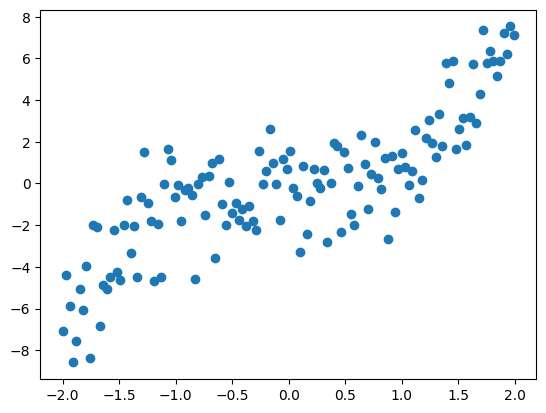

In [36]:
rng = np.random.default_rng(seed = 102)
Xnew = np.arange(-2, 2, 0.03)
ynew = Xnew**3 + rng.normal(0, 1.5, Xnew.shape[0])
X_test = np.column_stack((np.ones(Xnew.shape[0]), Xnew.reshape(-1, 1))).T
y_test = ynew.reshape(-1, 1)
plt.scatter(Xnew,ynew)

## Question 19

Find the loss for the test data points. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



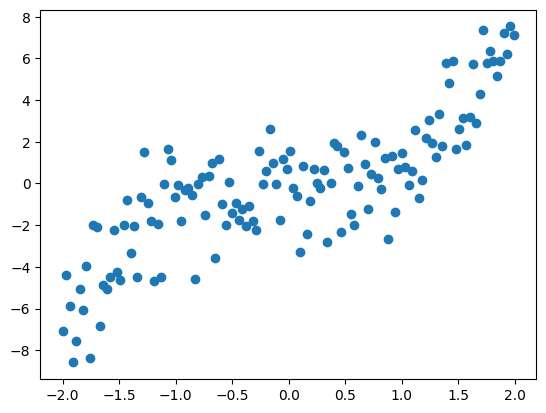

Loss for the test data points: 12.926869050896793


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Data creation
rng = np.random.default_rng(seed=102)
Xnew = np.arange(-2, 2, 0.03)
ynew = Xnew**3 + rng.normal(0, 1.5, Xnew.shape[0])
X_test = Xnew.reshape(-1, 1)
y_test = ynew.reshape(-1, 1)

# Plot the data
plt.scatter(Xnew, ynew)
plt.show()

# Kernel Regression
X = X_test
y = y_test

# Step 1: Compute the Kernel Matrix (Polynomial kernel of degree 3)
K = (X.dot(X.T) + 1) ** 3  # Kernel matrix of size (n, n)

# Step 2: Solve for alpha (K * alpha = y)
alpha = np.linalg.solve(K, y)

# Step 3: Compute the predictions for the test data
predictions = K.dot(alpha)

# Step 4: Calculate the number of test examples
n = X.shape[0]

# Step 5: Compute the squared errors
squared_errors = (y - predictions) ** 2

# Step 6: Compute the loss using the given formula
loss = np.sqrt(np.sum(squared_errors) / n)

print("Loss for the test data points:", loss)
